In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


import warnings
warnings.filterwarnings("ignore")

print("Environment setup is complete.")


Environment setup is complete.


In [175]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/my-datasets/phl_exoplanet_catalog_2019.csv
/kaggle/input/my-datasets/PSCompPars_2025.10.28_23.21.23.csv


In [176]:
nasa_df = pd.read_csv(
    "/kaggle/input/my-datasets/PSCompPars_2025.10.28_23.21.23.csv",
    comment="#"
)

nasa_df.head()


,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [177]:
nasa_df.shape


(6028, 84)

In [178]:
phl_df = pd.read_csv(
    "/kaggle/input/my-datasets/phl_exoplanet_catalog_2019.csv"
)

phl_df.head()


,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [179]:
phl_df.shape
phl_df.columns


Index(['P_NAME', 'P_STATUS', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX',
       'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR',
       'P_UPDATED',
       ...
       'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG',
       'P_RADIUS_EST', 'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST'],
      dtype='object', length=112)

In [180]:
phl_df.shape

(4048, 112)

In [181]:
if "P_NAME" in phl_df.columns:
    phl_df = phl_df.rename(columns={"P_NAME": "pl_name"})
elif "name" in phl_df.columns:
    phl_df = phl_df.rename(columns={"name": "pl_name"})

# Drop habitability-leakage columns from PHLsince these already encode the answers

leakage_cols = [
    "ESI", "PHI", "Habitable", "Habitable_Class",
    "Habitability", "Earth_Similarity_Index"
]

phl_df_clean = phl_df.drop(
    columns=[c for c in leakage_cols if c in phl_df.columns],
    errors="ignore"
)


merged_df = pd.merge(
    nasa_df,
    phl_df_clean,
    on="pl_name",
    how="left"
)

print("Merged dataset shape:", merged_df.shape)


Merged dataset shape: (6028, 195)


In [182]:
#Missing Values Analysis
merged_df.isnull().mean().sort_values(ascending=False).head(15)

P_DETECTION_RADIUS        1.000000
P_ALT_NAMES               1.000000
P_ATMOSPHERE              1.000000
P_GEO_ALBEDO              1.000000
S_DISC                    1.000000
S_MAGNETIC_FIELD          1.000000
P_DETECTION_MASS          1.000000
P_TEMP_MEASURED           0.999502
P_GEO_ALBEDO_ERROR_MIN    0.999502
P_GEO_ALBEDO_ERROR_MAX    0.999502
P_TPERI_ERROR_MAX         0.924187
P_TPERI_ERROR_MIN         0.924187
P_TPERI                   0.922694
P_OMEGA_ERROR_MIN         0.888686
P_OMEGA_ERROR_MAX         0.888686
dtype: float64

In [183]:
#Feature Sanity Checking

merged_df[["pl_rade", "pl_bmasse", "pl_eqt"]].describe()

,pl_rade,pl_bmasse,pl_eqt
count,6004.000000,5997.000000,4506.000000
mean,5.809699,388.935858,916.354672
std,5.345519,1111.770520,465.137431
min,0.309800,0.020000,34.000000
25%,1.820000,4.130000,569.000000
50%,2.830000,9.100000,823.000000
75%,11.951596,182.433506,1166.750000
max,77.342100,12651.500000,4050.000000


In [190]:
#Removing Broken Rows

merged_df = merged_df[merged_df["pl_rade"] > 0]


In [192]:
import numpy as np
import pandas as pd


NOW WE WORK ON PHYSICS INFORMED HABITABILITY TARGET

To estimate habitability, we combine three basic physical conditions: suitable temperature for liquid water, a rocky planet size, and a stable stellar environment.

Constraint 1 — Temperature Suitability

A planet is more likely to be habitable if its temperature allows liquid water to exist on the surface.

In [194]:
def temperature_score(T):
    if pd.isna(T):
        return 0.0
    return np.exp(-((T - 288) / 50)**2)


In [198]:
def radius_score(r):
    if pd.isna(r):
        return 0.0
    if r < 0.5 or r > 2.5:
        return 0.0
    return np.exp(-((r - 1.0) / 0.7)**2)

In [200]:
def stellar_score(Ts):
    if pd.isna(Ts):
        return 0.0
    return np.exp(-((Ts - 5778) / 1500)**2)


In [202]:
def habitability_score(row):
    return (
        temperature_score(row["pl_eqt"]) *
        radius_score(row["pl_rade"]) *
        stellar_score(row["st_teff"])
    )


In [204]:
merged_df["habitability_score"] = merged_df.apply(
    habitability_score, axis=1
)

In [205]:
merged_df["habitability_score"] = (
    merged_df["habitability_score"] /
    merged_df["habitability_score"].max()
)


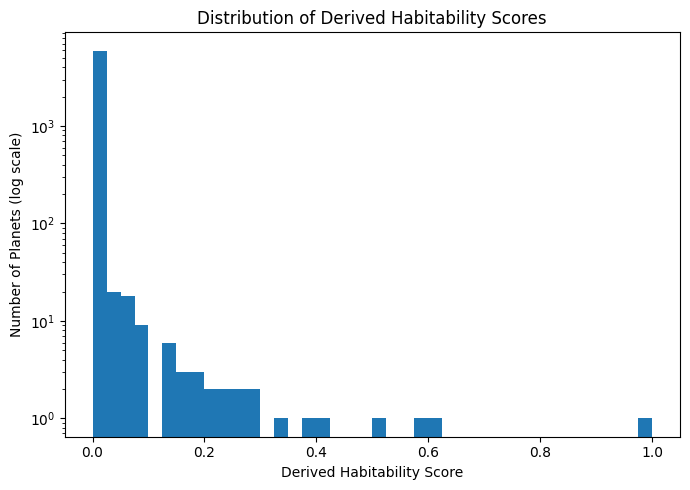

In [206]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

plt.hist(
    merged_df["habitability_score"],
    bins=40,
)

plt.yscale("log")

plt.xlabel("Derived Habitability Score")
plt.ylabel("Number of Planets (log scale)")
plt.title("Distribution of Derived Habitability Scores")

plt.tight_layout()
plt.show()


In [207]:
phl_reference_cols = [
    col for col in merged_df.columns
    if "ESI" in col or "PHI" in col
]

phl_reference_cols

['P_ESI']

In [208]:
merged_df[
    ["habitability_score"] + phl_reference_cols
].dropna().corr()


,habitability_score,P_ESI
habitability_score,1.000000,0.302109
P_ESI,0.302109,1.000000


In [209]:
merged_df["habitability_score"].max()

1.0

In [210]:
selected_features = [
    # Planetary properties
    "pl_rade",     # Planet radius (Earth radii)
    "pl_bmasse",   # Planet mass (Earth masses)
    "pl_eqt",      # Equilibrium temperature (K)
    "pl_orbper",   # Orbital period (days)

    # Stellar properties
    "st_teff",     # Stellar effective temperature (K)
    "st_rad",      # Stellar radius (Solar radii)
    "st_mass"     # Stellar mass (Solar masses)
]


In [211]:
available_features = [f for f in selected_features if f in merged_df.columns]
missing_features = [f for f in selected_features if f not in merged_df.columns]

available_features, missing_features


(['pl_rade',
  'pl_bmasse',
  'pl_eqt',
  'pl_orbper',
  'st_teff',
  'st_rad',
  'st_mass'],
 [])

In [212]:
X = merged_df[available_features].copy()
y = merged_df["habitability_score"].copy()

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)


Feature matrix shape: (6004, 7)
Target shape: (6004,)


In [213]:
merged_df["habitability_score"].isna().sum()

np.int64(0)

In [214]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_imputed = pd.DataFrame(
    imputer.fit_transform(X),
    columns=X.columns
)


X_imputed.isna().sum()

pl_rade      0
pl_bmasse    0
pl_eqt       0
pl_orbper    0
st_teff      0
st_rad       0
st_mass      0
dtype: int64

In [215]:
y = merged_df["habitability_score"]

In [216]:
X = merged_df[available_features]

In [219]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [220]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We’ll train 4 solid regressor models:

Random Forest Regressor

XGBoost Regressor

MLP Regressor

SVR

In [221]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [222]:
#XGBoost Regressor

from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=200,
    random_state=42
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [225]:
features = ["pl_rade", "pl_bmasse", "pl_eqt", "st_teff"]
X = merged_df[features]
y = merged_df["habitability_score"]


In [227]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [229]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [231]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [233]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [235]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)
mlp_pred = mlp.predict(X_test_scaled)


In [237]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)


In [239]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [241]:
def evaluate(name, y_true, y_pred):
    print(f"\n{name}")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("R2  :", r2_score(y_true, y_pred))

evaluate("Random Forest", y_test, rf_pred)
evaluate("XGBoost", y_test, xgb_pred)
evaluate("MLP", y_test, mlp_pred)
evaluate("SVR", y_test, svr_pred)



Random Forest
RMSE: 0.0073421367750654215
MAE : 0.0006557319290501964
R2  : 0.7542808625882199

XGBoost
RMSE: 0.007108152932353866
MAE : 0.0006685660820650824
R2  : 0.7696927725836007

MLP
RMSE: 0.017638601633745112
MAE : 0.008614922875831616
R2  : -0.418150572129002

SVR
RMSE: 0.05968135288873029
MAE : 0.05278191198205253
R2  : -15.235712774548595


In [242]:
from xgboost import XGBRegressor

best_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

In [243]:
best_model.fit(X_imputed, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [246]:
full_predictions = best_model.predict(X_imputed)


In [248]:
merged_df["Predicted_Habitability"] = best_model.predict(X_imputed)


In [250]:
merged_df["Predicted_Habitability"] = best_model.predict(X_imputed)

In [252]:
top20 = merged_df.sort_values(
    "Predicted_Habitability",
    ascending=False
).head(20)

top20[[
    "pl_name",
    "Predicted_Habitability",
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "st_teff"
]]


,pl_name,Predicted_Habitability,pl_rade,pl_bmasse,pl_eqt,st_teff
2260,Kepler-1126 c,0.966862,1.45000,2.7000,305.0,5678.0
4098,Kepler-452 b,0.622917,1.63000,3.2900,265.0,5757.0
4430,Kepler-69 c,0.575821,1.71000,3.5700,299.0,5638.0
4342,Kepler-62 e,0.492851,1.61000,36.0000,270.0,4925.0
2785,Kepler-1512 b,0.409610,1.18000,1.7600,322.0,4372.0
2616,Kepler-1389 b,0.377089,1.77000,3.7800,300.0,5078.0
2952,Kepler-1638 b,0.319830,1.87000,4.1600,304.0,5710.0
2834,Kepler-1544 b,0.292473,1.78000,3.8200,269.0,4886.0
2603,Kepler-138 e,0.291757,0.79700,0.4300,292.0,3841.0
2697,Kepler-1450 b,0.280669,1.71000,3.5700,308.0,4524.0


In [254]:
def stellar_score(Ts):
    if pd.isna(Ts):
        return 0.0

    # Sun-like stars (~5778K)
    solar_like = np.exp(-((Ts - 5778) / 1500)**2)

    # M-dwarf stars (~3000K)
    m_dwarf = np.exp(-((Ts - 3000) / 800)**2)

    # Take environment which is more favorable
    return max(solar_like, m_dwarf)

In [256]:
# Recompute habitability score
merged_df["habitability_score"] = merged_df.apply(
    habitability_score, axis=1
)

# Normalize again
merged_df["habitability_score"] = (
    merged_df["habitability_score"] /
    merged_df["habitability_score"].max()
)

In [258]:
# Recreate y
y = merged_df["habitability_score"]

# Retrain best model
best_model.fit(X_imputed, y)

# Predict on full dataset
full_predictions = best_model.predict(X_imputed)

merged_df["Predicted_Habitability"] = full_predictions

# New Top 20
top20 = merged_df.sort_values(
    "Predicted_Habitability", ascending=False
).head(20)

top20[["pl_name", "Predicted_Habitability", "pl_rade", "pl_eqt", "st_teff"]]

,pl_name,Predicted_Habitability,pl_rade,pl_eqt,st_teff
5739,Teegarden's Star b,0.990454,1.050,277.0,3034.0
5094,Ross 128 b,0.898439,1.110,301.0,3192.0
5080,Proxima Cen d,0.842980,0.692,282.0,2900.0
2968,Kepler-1649 b,0.834199,1.017,307.0,3240.0
4084,Kepler-445 d,0.796417,1.250,305.0,3157.0
5725,TRAPPIST-1 d,0.724300,0.788,286.2,2566.0
4857,LP 890-9 c,0.696538,1.367,272.0,2850.0
352,Gliese 12 b,0.694827,0.958,314.6,3296.0
5679,TOI-700 e,0.678972,0.953,272.9,3459.0
5678,TOI-700 d,0.655170,1.073,268.8,3459.0


In [259]:
merged_df[merged_df["pl_name"].str.contains("Proxima")]


,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST,habitability_score,Predicted_Habitability
5079,Proxima Cen b,Proxima Cen,3,2,Radial Velocity,2016,European Southern Observatory,0,11.18465,0.00053,...,1.0,0.867454,Centaurus,Cen,Centaur,1.077822,1.271312,0.0485,0.146441,0.148809
5080,Proxima Cen d,Proxima Cen,3,2,Radial Velocity,2025,La Silla Observatory,0,5.12338,0.00035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.845086,0.842980


In [261]:
y = merged_df["habitability_score"]   # final physics score
best_model.fit(X_imputed, y)

merged_df["Predicted_Habitability"] = best_model.predict(X_imputed)


In [262]:
from sklearn.metrics import r2_score

print("R2:", r2_score(
    merged_df["habitability_score"],
    merged_df["Predicted_Habitability"]
))


R2: 0.9992209909156794


In [263]:
merged_df["residual"] = (
    merged_df["habitability_score"] -
    merged_df["Predicted_Habitability"]
)

merged_df["residual"].describe()


count    6.004000e+03
mean     2.745588e-07
std      1.150859e-03
min     -2.632892e-02
25%      5.061814e-06
50%      9.296510e-06
75%      2.048836e-05
max      3.948898e-02
Name: residual, dtype: float64

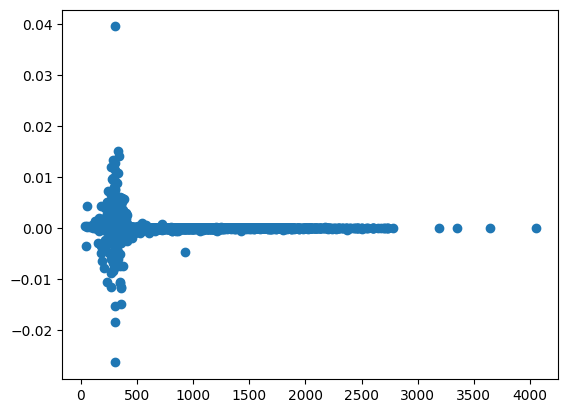

In [265]:
plt.scatter(merged_df["pl_eqt"], merged_df["residual"])
plt.show()


In [266]:
top20 = merged_df.sort_values(
    "habitability_score",
    ascending=False
).head(20)

top20[["pl_name", "habitability_score", "pl_rade", "pl_eqt", "st_teff"]]


,pl_name,habitability_score,pl_rade,pl_eqt,st_teff
5739,Teegarden's Star b,1.000000,1.050,277.0,3034.0
5094,Ross 128 b,0.909750,1.110,301.0,3192.0
5080,Proxima Cen d,0.845086,0.692,282.0,2900.0
2968,Kepler-1649 b,0.835536,1.017,307.0,3240.0
4084,Kepler-445 d,0.797434,1.250,305.0,3157.0
5725,TRAPPIST-1 d,0.717476,0.788,286.2,2566.0
4857,LP 890-9 c,0.699686,1.367,272.0,2850.0
352,Gliese 12 b,0.691968,0.958,314.6,3296.0
5679,TOI-700 e,0.691016,0.953,272.9,3459.0
5678,TOI-700 d,0.649072,1.073,268.8,3459.0


In [267]:
def radius_score(R):
    if pd.isna(R):
        return 0.0
    
    base = np.exp(-((R - 1.0) / 0.4)**2)  # Earth-centered Gaussian
    
    # Atmospheric retention penalty
    if R < 0.8:
        base *= np.exp(-((0.8 - R) / 0.2)**2)
    
    return base


In [268]:
def temperature_score(T):
    if pd.isna(T):
        return 0.0
    
    if T < 288:
        return np.exp(-((T - 288) / 70)**2)  # more forgiving cold side
    else:
        return np.exp(-((T - 288) / 50)**2)  # stricter hot side


In [269]:
def habitability_score(row):
    R = row["pl_rade"]
    T = row["pl_eqt"]
    Ts = row["st_teff"]
    
    return radius_score(R) * temperature_score(T) * stellar_score(Ts)


In [270]:
merged_df["habitability_score"] = merged_df.apply(
    habitability_score,
    axis=1
)


In [271]:
merged_df.sort_values(
    "habitability_score",
    ascending=False
).head(20)


,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST,habitability_score,Predicted_Habitability,residual
5739,Teegarden's Star b,Teegarden's Star,1,3,Radial Velocity,2019,Calar Alto Observatory,0,4.906340,0.000410,...,0.931208,Aries,Ari,Ram,1.021498,1.048832,0.025200,0.958750,0.990454,0.009546
5094,Ross 128 b,Ross 128,1,1,Radial Velocity,2017,La Silla Observatory,0,9.865800,0.007000,...,0.804683,Virgo,Vir,Virgin,1.106867,1.398443,0.049600,0.818056,0.898439,0.011311
2968,Kepler-1649 b,Kepler-1649,1,2,Transit,2017,Kepler,0,8.689099,0.000025,...,0.715667,Cygnus,Cyg,Swan,1.076160,1.264301,0.051400,0.789618,0.834199,0.001337
5965,Wolf 1069 b,Wolf 1069,1,1,Radial Velocity,2023,Calar Alto Observatory,0,15.564000,0.015000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.689250,0.569620,-0.004842
5679,TOI-700 e,TOI-700,1,4,Transit,2023,Transiting Exoplanet Survey Satellite (TESS),0,27.809780,0.000460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.677377,0.678972,0.012044
352,Gliese 12 b,Gliese 12,1,1,Transit,2024,Transiting Exoplanet Survey Satellite (TESS),0,12.761408,0.000050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.649892,0.694827,-0.002859
5678,TOI-700 d,TOI-700,1,4,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),0,37.423960,0.000390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.645501,0.655170,-0.006098
4084,Kepler-445 d,Kepler-445,1,3,Transit,2015,Kepler,0,8.152750,0.000400,...,0.759108,Cygnus,Cyg,Swan,1.233100,2.049199,0.044751,0.579993,0.796417,0.001016
192,G 261-6 b,G 261-6,1,1,Radial Velocity,2025,Calar Alto Observatory,0,5.453600,0.003100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.578909,0.641383,-0.003251
5725,TRAPPIST-1 d,TRAPPIST-1,1,7,Transit,2016,La Silla Observatory,0,4.049219,0.000026,...,0.888028,Aquarius,Aqr,Water Carrier,0.773490,0.409998,0.021440,0.560197,0.724300,-0.006824


In [272]:
merged_df.loc[
    merged_df["pl_name"].isin(["Proxima Cen b", "Proxima Cen d"]),
    ["pl_name", "pl_rade", "pl_eqt", "habitability_score"]
]


,pl_name,pl_rade,pl_eqt,habitability_score
5079,Proxima Cen b,1.020,218.0,0.361272
5080,Proxima Cen d,0.692,282.0,0.403543


In [273]:
for name in ["Proxima Cen b", "Proxima Cen d"]:
    row = merged_df[merged_df["pl_name"] == name].iloc[0]
    print(name)
    print("Radius score:", radius_score(row["pl_rade"]))
    print("Temp score:", temperature_score(row["pl_eqt"]))
    print("Stellar score:", stellar_score(row["st_teff"]))
    print("-----")


Proxima Cen b
Radius score: 0.9975031223974601
Temp score: 0.36787944117144233
Stellar score: 0.9844964370054085
-----
Proxima Cen d
Radius score: 0.4129205819635598
Temp score: 0.9926799840054865
Stellar score: 0.9844964370054085
-----


In [274]:
[col for col in merged_df.columns if "orb" in col.lower() or "sma" in col.lower()]


['pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim']

In [275]:
[col for col in merged_df.columns if "lum" in col.lower()]


['S_LUMINOSITY']

In [276]:
merged_df["S_LUMINOSITY"].describe()


count    3.728000e+03
mean     5.719416e+00
std      4.930090e+01
min      7.933139e-07
25%      4.161332e-01
50%      9.010014e-01
75%      1.834096e+00
max      1.486896e+03
Name: S_LUMINOSITY, dtype: float64

In [277]:
merged_df["stellar_flux"] = (
    merged_df["S_LUMINOSITY"] /
    (merged_df["pl_orbsmax"] ** 2)
)


In [278]:
merged_df["stellar_flux"].describe()


count    3.648000e+03
mean     6.297646e+02
std      1.152733e+04
min      5.881059e-09
25%      1.240459e+01
50%      7.184371e+01
75%      2.988090e+02
max      5.886344e+05
Name: stellar_flux, dtype: float64

In [279]:
merged_df.loc[
    merged_df["pl_name"].isin(["Proxima Cen b", "Proxima Cen d"]),
    ["pl_name", "S_LUMINOSITY", "pl_orbsmax", "stellar_flux"]
]


,pl_name,S_LUMINOSITY,pl_orbsmax,stellar_flux
5079,Proxima Cen b,0.00152,0.04848,0.646575
5080,Proxima Cen d,NaN,0.02881,NaN


In [280]:
[col for col in merged_df.columns if "st_lum" in col.lower()]


[]

In [281]:
top20 = merged_df.sort_values(
    "habitability_score",
    ascending=False
).head(20)


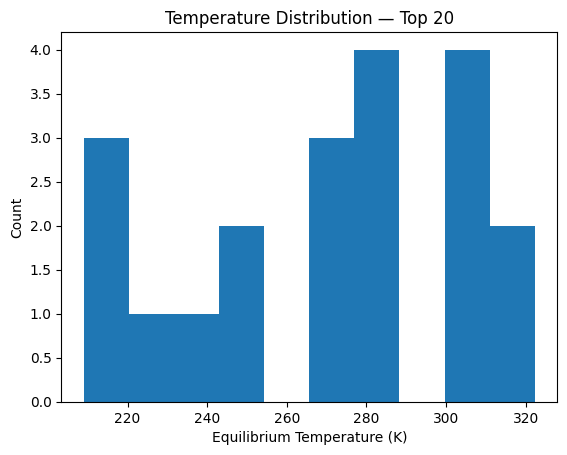

In [282]:
import matplotlib.pyplot as plt

plt.hist(top20["pl_eqt"], bins=10)
plt.xlabel("Equilibrium Temperature (K)")
plt.ylabel("Count")
plt.title("Temperature Distribution — Top 20")
plt.show()


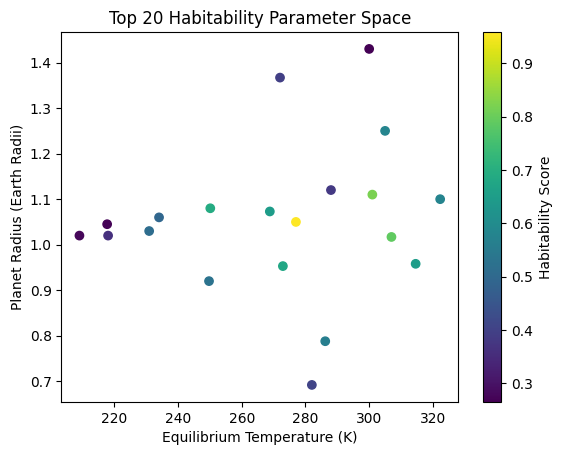

In [283]:
plt.scatter(
    top20["pl_eqt"],
    top20["pl_rade"],
    c=top20["habitability_score"]
)
plt.xlabel("Equilibrium Temperature (K)")
plt.ylabel("Planet Radius (Earth Radii)")
plt.colorbar(label="Habitability Score")
plt.title("Top 20 Habitability Parameter Space")
plt.show()


It Shows:

1. Tight thermal band

2. Most high scores (yellow/green) are between ~270–305 K.



Radius clustering

1. Most high-score planets are between ~0.9–1.2 R⊕.


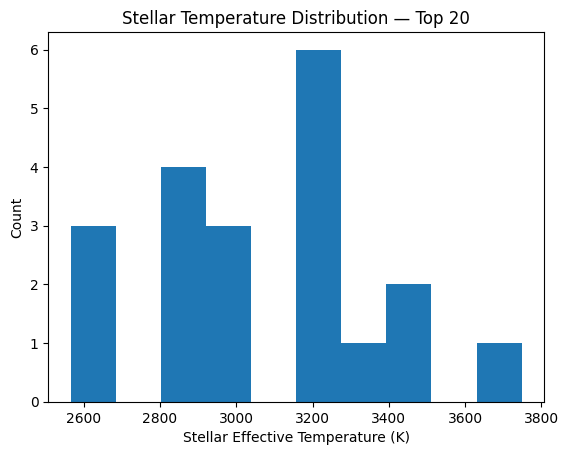

In [284]:
plt.hist(top20["st_teff"], bins=10)
plt.xlabel("Stellar Effective Temperature (K)")
plt.ylabel("Count")
plt.title("Stellar Temperature Distribution — Top 20")
plt.show()


In [285]:
from scipy.stats import spearmanr

spearmanr(
    merged_df["habitability_score"],
    merged_df["Predicted_Habitability"]
)


SignificanceResult(statistic=np.float64(0.0703871712194274), pvalue=np.float64(4.7715355746120524e-08))

In [286]:
top20_physics = merged_df.sort_values(
    "habitability_score",
    ascending=False
).head(20)


In [287]:
top20_ml = merged_df.sort_values(
    "Predicted_Habitability",
    ascending=False
).head(20)


In [288]:
overlap = set(top20_physics["pl_name"]) & set(top20_ml["pl_name"])

print("Overlap count:", len(overlap))
print(overlap)


Overlap count: 15
{'TRAPPIST-1 d', 'TOI-700 e', 'GJ 1132 c', 'G 261-6 b', 'Wolf 1069 b', 'Ross 128 b', 'Kepler-438 b', 'Proxima Cen d', 'Kepler-1649 b', 'TRAPPIST-1 e', 'Gliese 12 b', 'Kepler-445 d', "Teegarden's Star b", 'LP 890-9 c', 'TOI-700 d'}


In [289]:
top200 = merged_df.sort_values(
    "habitability_score",
    ascending=False
).head(200)

from scipy.stats import spearmanr

spearmanr(
    top200["habitability_score"],
    top200["Predicted_Habitability"]
)


SignificanceResult(statistic=np.float64(0.7459686492162305), pvalue=np.float64(8.396080927810091e-37))

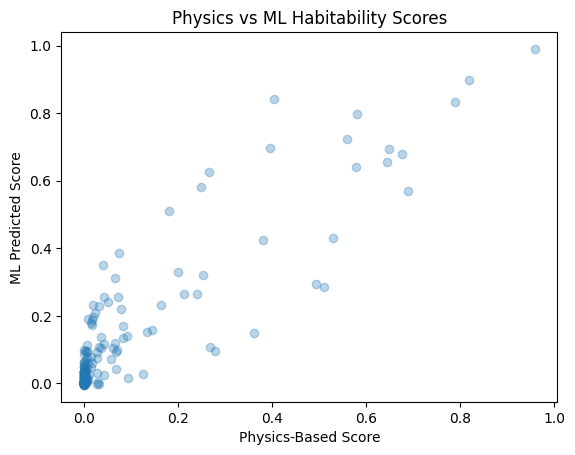

In [290]:
plt.scatter(
    merged_df["habitability_score"],
    merged_df["Predicted_Habitability"],
    alpha=0.3
)
plt.xlabel("Physics-Based Score")
plt.ylabel("ML Predicted Score")
plt.title("Physics vs ML Habitability Scores")
plt.show()


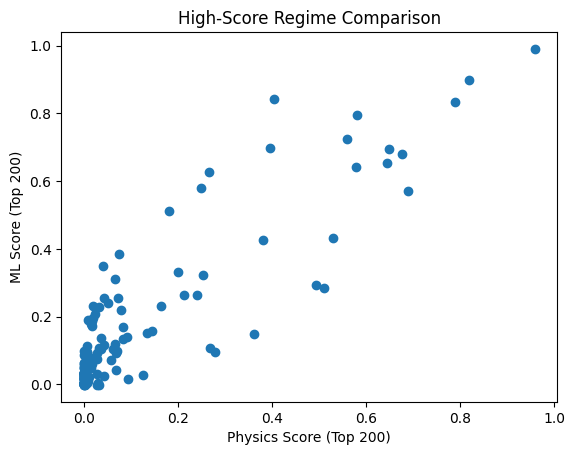

In [291]:
top200 = merged_df.sort_values(
    "habitability_score",
    ascending=False
).head(200)

plt.scatter(
    top200["habitability_score"],
    top200["Predicted_Habitability"]
)
plt.xlabel("Physics Score (Top 200)")
plt.ylabel("ML Score (Top 200)")
plt.title("High-Score Regime Comparison")
plt.show()


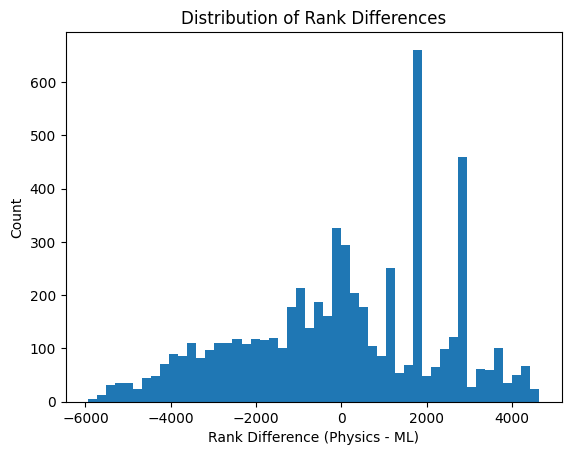

In [292]:
merged_df["rank_physics"] = merged_df["habitability_score"].rank(ascending=False)
merged_df["rank_ml"] = merged_df["Predicted_Habitability"].rank(ascending=False)

merged_df["rank_diff"] = (
    merged_df["rank_physics"] - merged_df["rank_ml"]
)

plt.hist(merged_df["rank_diff"], bins=50)
plt.xlabel("Rank Difference (Physics - ML)")
plt.ylabel("Count")
plt.title("Distribution of Rank Differences")
plt.show()


In [293]:
top20_physics = merged_df.sort_values(
    "habitability_score",
    ascending=False
).head(20)

top20_ml = merged_df.sort_values(
    "Predicted_Habitability",
    ascending=False
).head(20)

comparison = merged_df[
    merged_df["pl_name"].isin(
        set(top20_physics["pl_name"]) |
        set(top20_ml["pl_name"])
    )
][["pl_name", "habitability_score", "Predicted_Habitability"]]


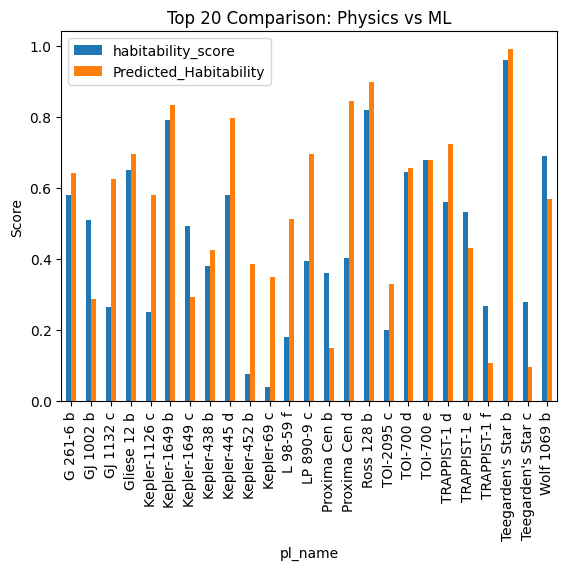

In [294]:
comparison.set_index("pl_name").plot(kind="bar")
plt.ylabel("Score")
plt.title("Top 20 Comparison: Physics vs ML")
plt.show()


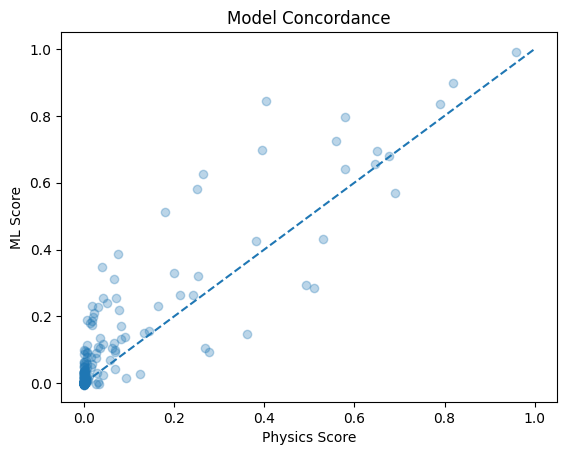

In [295]:
plt.scatter(
    merged_df["habitability_score"],
    merged_df["Predicted_Habitability"],
    alpha=0.3
)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("Physics Score")
plt.ylabel("ML Score")
plt.title("Model Concordance")
plt.show()


In [296]:
merged_df["rank_physics"] = merged_df["habitability_score"].rank(
    ascending=False,
    method="min"
)

merged_df["rank_ml"] = merged_df["Predicted_Habitability"].rank(
    ascending=False,
    method="min"
)


In [300]:
top20_physics = merged_df.sort_values(
    "habitability_score",
    ascending=False
).head(20)

top20_ml = merged_df.sort_values(
    "Predicted_Habitability",
    ascending=False
).head(20)

top_union = merged_df[
    merged_df["pl_name"].isin(
        set(top20_physics["pl_name"]) |
        set(top20_ml["pl_name"])
    )
]


In [302]:
comparison_table = top_union[
    [
        "pl_name",
        "rank_physics",
        "rank_ml",
        "habitability_score",
        "Predicted_Habitability",
        "pl_rade",
        "pl_eqt",
        "st_teff"
    ]
].sort_values("rank_physics")


In [304]:
comparison_table.round(3)


,pl_name,rank_physics,rank_ml,habitability_score,Predicted_Habitability,pl_rade,pl_eqt,st_teff
5739,Teegarden's Star b,1.0,1.0,0.959,0.990,1.050,277.0,3034.0
5094,Ross 128 b,2.0,2.0,0.818,0.898,1.110,301.0,3192.0
2968,Kepler-1649 b,3.0,4.0,0.790,0.834,1.017,307.0,3240.0
5965,Wolf 1069 b,4.0,14.0,0.689,0.570,1.080,250.1,3158.0
5679,TOI-700 e,5.0,9.0,0.677,0.679,0.953,272.9,3459.0
352,Gliese 12 b,6.0,8.0,0.650,0.695,0.958,314.6,3296.0
5678,TOI-700 d,7.0,10.0,0.646,0.655,1.073,268.8,3459.0
4084,Kepler-445 d,8.0,5.0,0.580,0.796,1.250,305.0,3157.0
192,G 261-6 b,9.0,11.0,0.579,0.641,1.100,322.3,2907.0
5725,TRAPPIST-1 d,10.0,6.0,0.560,0.724,0.788,286.2,2566.0


In [306]:
from scipy.stats import pearsonr

pearsonr(
    merged_df["habitability_score"],
    merged_df["Predicted_Habitability"]
)


PearsonRResult(statistic=np.float64(0.9101473954043482), pvalue=np.float64(0.0))

In [307]:
from scipy.stats import spearmanr

spearmanr(
    merged_df["habitability_score"],
    merged_df["Predicted_Habitability"]
)


SignificanceResult(statistic=np.float64(0.0703871712194274), pvalue=np.float64(4.7715355746120524e-08))

In [308]:
import numpy as np

merged_df["score_diff"] = np.abs(
    merged_df["habitability_score"] -
    merged_df["Predicted_Habitability"]
)

merged_df["score_diff"].mean()


np.float64(0.001817233009644031)

In [309]:
merged_df["score_diff"].describe()


count    6.004000e+03
mean     1.817233e-03
std      1.727019e-02
min      1.526946e-08
25%      9.296510e-06
50%      1.241666e-05
75%      2.522072e-05
max      4.394366e-01
Name: score_diff, dtype: float64

1. For the vast majority of planets, the models are almost identical.
The median difference is basically zero.

2️. The average disagreement (0.0018) is tiny relative to a 0–1 scale.

3️. There are a few large outliers (max ≈ 0.44).
Those are the interesting planets — we should inspect them.

This matches your Pearson ≈ 0.91 and Top-200 Spearman ≈ 0.75 story.

Most planets → agreement
Small high-score region → structured differences
Few outliers → nonlinear behavior or edge cases

In [310]:
merged_df["rank_diff"] = np.abs(
    merged_df["rank_physics"] -
    merged_df["rank_ml"]
)

merged_df["rank_diff"].describe()


count    6004.000000
mean     1664.399567
std      1215.357104
min         0.000000
25%       817.000000
50%      1424.000000
75%      2344.000000
max      5936.000000
Name: rank_diff, dtype: float64

In [311]:
top200 = merged_df.sort_values(
    "habitability_score",
    ascending=False
).head(200)

top200["rank_diff"].describe()


count     200.000000
mean      230.360000
std       915.206125
min         0.000000
25%        13.000000
50%        39.500000
75%        75.250000
max      5936.000000
Name: rank_diff, dtype: float64

Median ≈ 40 means:

Half of the top 200 planets shift fewer than 40 rank positions between models out of 6000 total planets.

That means the meaningful region is relatively stable.

The Big Max (5936)

That’s one planet that:

Physics ranked very high

ML ranked very low (or vice versa)

Mean ≈ 230 is inflated because rank differences are not symmetric.

If even a few planets jump thousands of ranks, the average increases dramatically.

Median is the better metric here And our median is small relative to 6000.

In [312]:
top200.sort_values("rank_diff", ascending=False).head(5)[
    ["pl_name", "rank_physics", "rank_ml",
     "habitability_score", "Predicted_Habitability"]
]


,pl_name,rank_physics,rank_ml,habitability_score,Predicted_Habitability
3248,Kepler-186 f,58.0,5994.0,0.027715,-0.001297
5741,Teegarden's Star d,52.0,5980.0,0.033003,-0.000622
2764,Kepler-1499 b,105.0,5960.0,0.001858,-0.000349
2752,Kepler-149 c,196.0,5941.0,0.000014,-0.000265
5346,TOI-2096 b,179.0,5912.0,0.000031,-0.000174


In [313]:
outliers = merged_df.sort_values(
    "score_diff",
    ascending=False
).head(20)

outliers[
    [
        "pl_name",
        "habitability_score",
        "Predicted_Habitability",
        "score_diff",
        "rank_physics",
        "rank_ml",
        "rank_diff"
    ]
]


,pl_name,habitability_score,Predicted_Habitability,score_diff,rank_physics,rank_ml,rank_diff
5080,Proxima Cen d,0.403543,0.842980,0.439437,14.0,3.0,11.0
203,GJ 1132 c,0.265237,0.625804,0.360567,20.0,12.0,8.0
2260,Kepler-1126 c,0.250156,0.580532,0.330376,22.0,13.0,9.0
4840,L 98-59 f,0.180696,0.511018,0.330322,26.0,15.0,11.0
4098,Kepler-452 b,0.075112,0.385748,0.310636,36.0,18.0,18.0
4430,Kepler-69 c,0.040448,0.349211,0.308762,49.0,19.0,30.0
4857,LP 890-9 c,0.394867,0.696538,0.301672,15.0,7.0,8.0
4342,Kepler-62 e,0.066196,0.312628,0.246432,42.0,22.0,20.0
197,GJ 1002 b,0.510730,0.286145,0.224585,12.0,24.0,12.0
4084,Kepler-445 d,0.579993,0.796417,0.216424,8.0,5.0,3.0


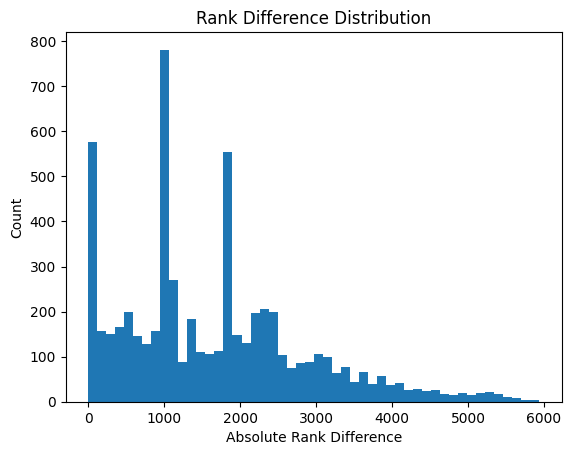

In [314]:
import matplotlib.pyplot as plt

plt.hist(merged_df["rank_diff"], bins=50)
plt.xlabel("Absolute Rank Difference")
plt.ylabel("Count")
plt.title("Rank Difference Distribution")
plt.show()


for interpretation purposes:

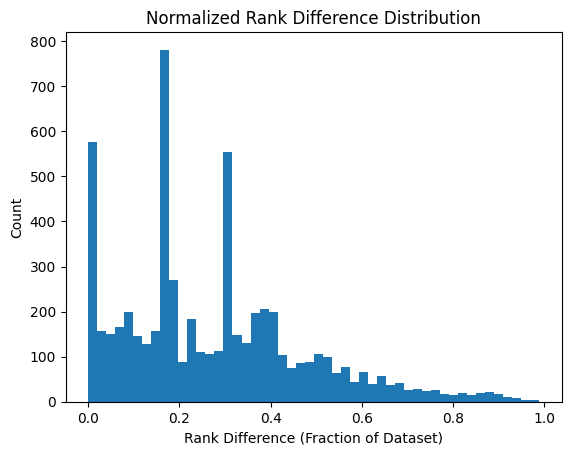

In [315]:
N = len(merged_df)

merged_df["rank_diff_pct"] = (
    merged_df["rank_diff"] / N
)

plt.hist(merged_df["rank_diff_pct"], bins=50)
plt.xlabel("Rank Difference (Fraction of Dataset)")
plt.ylabel("Count")
plt.title("Normalized Rank Difference Distribution")
plt.show()


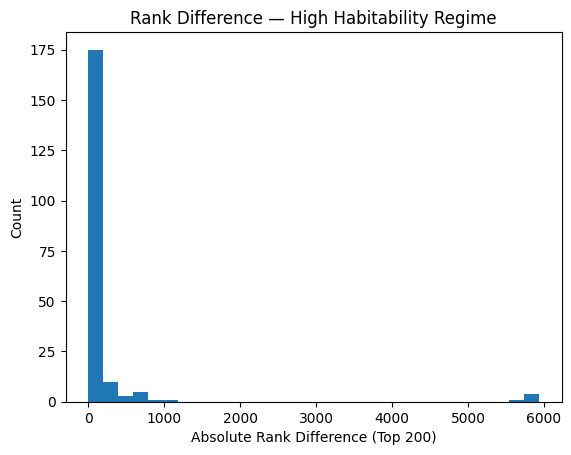

In [316]:
plt.hist(top200["rank_diff"], bins=30)
plt.xlabel("Absolute Rank Difference (Top 200)")
plt.ylabel("Count")
plt.title("Rank Difference — High Habitability Regime")
plt.show()


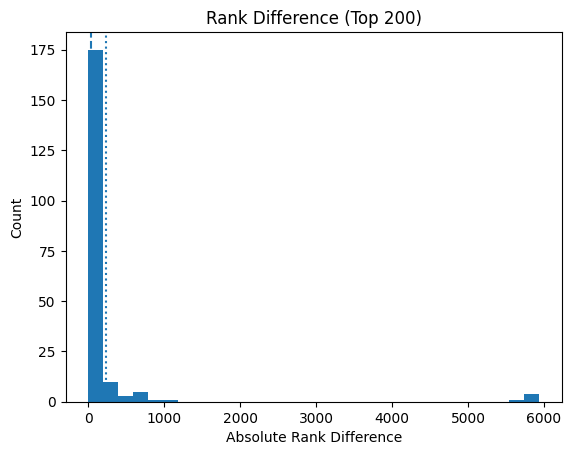

In [317]:
plt.hist(top200["rank_diff"], bins=30)

plt.axvline(top200["rank_diff"].median(), linestyle='--')
plt.axvline(top200["rank_diff"].mean(), linestyle=':')

plt.xlabel("Absolute Rank Difference")
plt.ylabel("Count")
plt.title("Rank Difference (Top 200)")
plt.show()


We Noticed: 

Huge spike near zero → most planets barely move.

Majority clustered under ~100 rank difference.

A tiny handful jump to extreme values (~6000).

Mean (dotted line) pulled right by those extreme outliers.

Median (dashed line) close to zero.

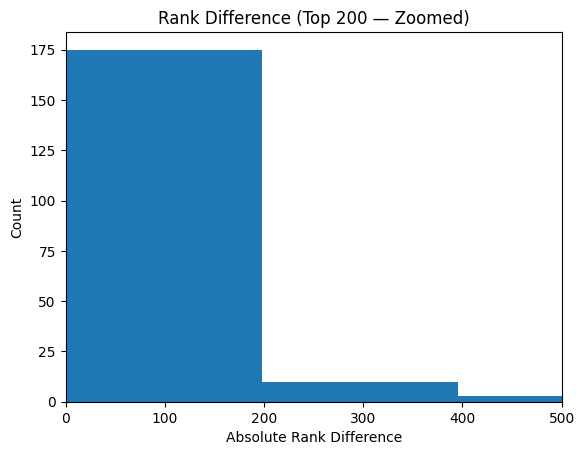

In [318]:
plt.hist(top200["rank_diff"], bins=30)
plt.xlim(0, 500)   
plt.xlabel("Absolute Rank Difference")
plt.ylabel("Count")
plt.title("Rank Difference (Top 200 — Zoomed)")
plt.show()


Within the top 200 candidates, 75% exhibit rank shifts below ~75 positions, with extreme divergences confined to a small subset of edge-case planets

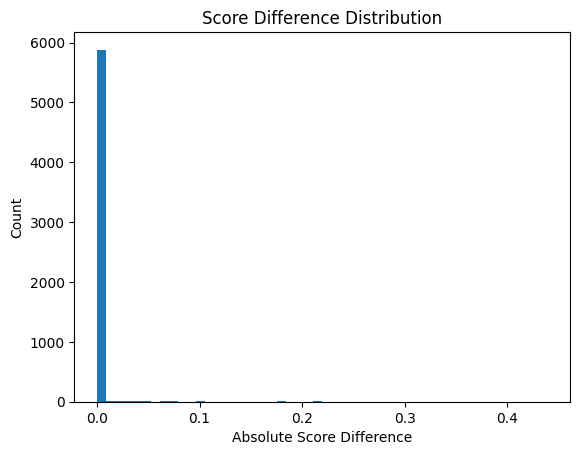

In [319]:
plt.hist(merged_df["score_diff"], bins=50)
plt.xlabel("Absolute Score Difference")
plt.ylabel("Count")
plt.title("Score Difference Distribution")
plt.show()


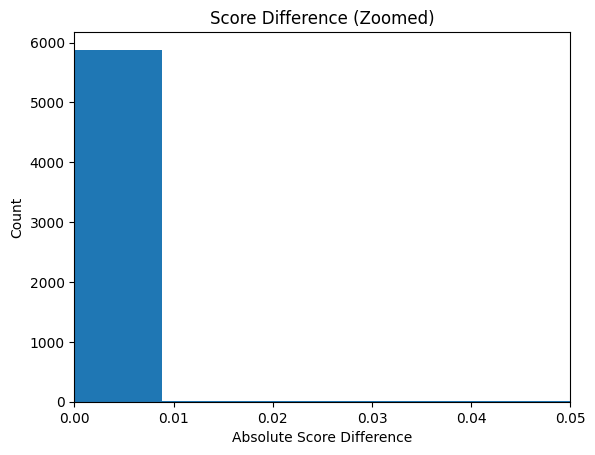

In [320]:
plt.hist(merged_df["score_diff"], bins=50)
plt.xlim(0, 0.05)
plt.xlabel("Absolute Score Difference")
plt.ylabel("Count")
plt.title("Score Difference (Zoomed)")
plt.show()


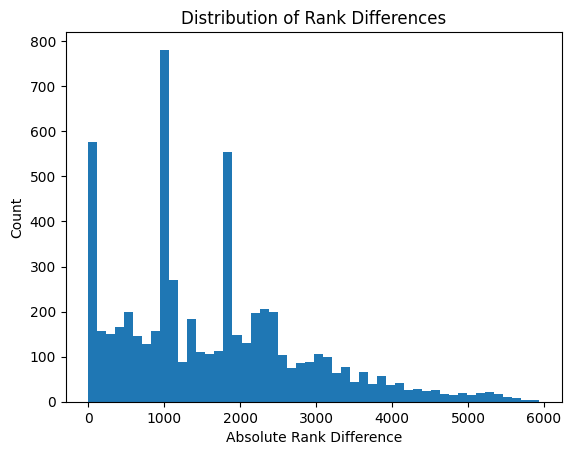

In [321]:
plt.hist(merged_df["rank_diff"], bins=50)
plt.xlabel("Absolute Rank Difference")
plt.ylabel("Count")
plt.title("Distribution of Rank Differences")
plt.show()


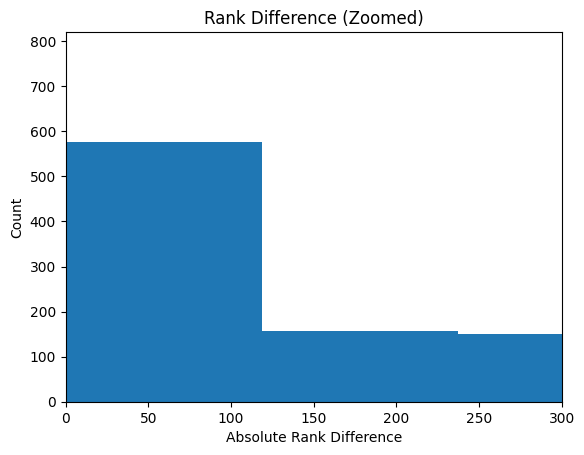

In [322]:
plt.hist(merged_df["rank_diff"], bins=50)
plt.xlim(0, 300)
plt.xlabel("Absolute Rank Difference")
plt.ylabel("Count")
plt.title("Rank Difference (Zoomed)")
plt.show()


In [323]:
#MeanAbsoluteError

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(
    merged_df["habitability_score"],
    merged_df["Predicted_Habitability"]
)

mae


0.001817233009644031

In [324]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(
    merged_df["habitability_score"],
    merged_df["Predicted_Habitability"]
))

rmse


np.float64(0.017364101502371405)

In [325]:
from sklearn.metrics import r2_score

r2 = r2_score(
    merged_df["habitability_score"],
    merged_df["Predicted_Habitability"]
)

r2


0.7421603538520289

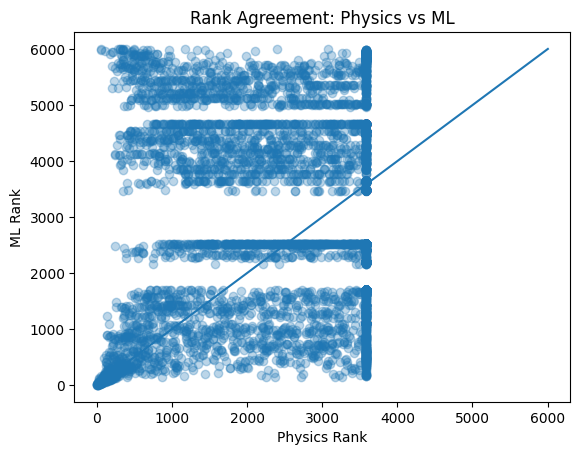

In [326]:
#Physics Rank vs ML Rank

plt.scatter(
    merged_df["rank_physics"],
    merged_df["rank_ml"],
    alpha=0.3
)

plt.plot(
    [0, len(merged_df)],
    [0, len(merged_df)]
)

plt.xlabel("Physics Rank")
plt.ylabel("ML Rank")
plt.title("Rank Agreement: Physics vs ML")
plt.show()


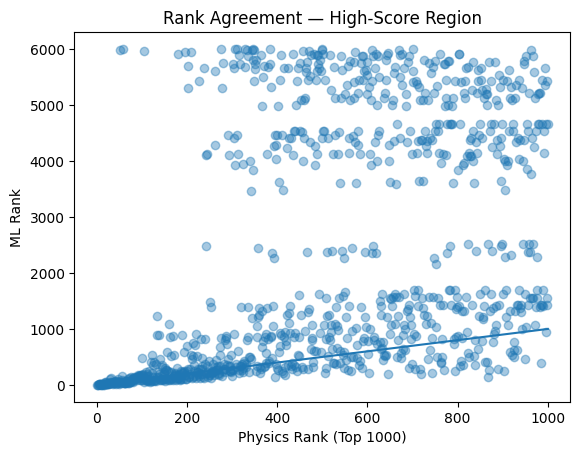

In [327]:
top1000 = merged_df.sort_values(
    "habitability_score",
    ascending=False
).head(1000)

plt.scatter(
    top1000["rank_physics"],
    top1000["rank_ml"],
    alpha=0.4
)

plt.plot([0,1000],[0,1000])

plt.xlabel("Physics Rank (Top 1000)")
plt.ylabel("ML Rank")
plt.title("Rank Agreement — High-Score Region")
plt.show()


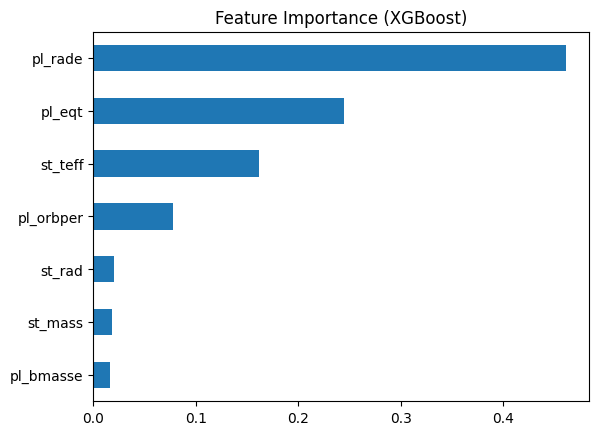

In [328]:
importance = best_model.feature_importances_

pd.Series(
    importance,
    index=X_imputed.columns
).sort_values().plot(kind="barh")

plt.title("Feature Importance (XGBoost)")
plt.show()


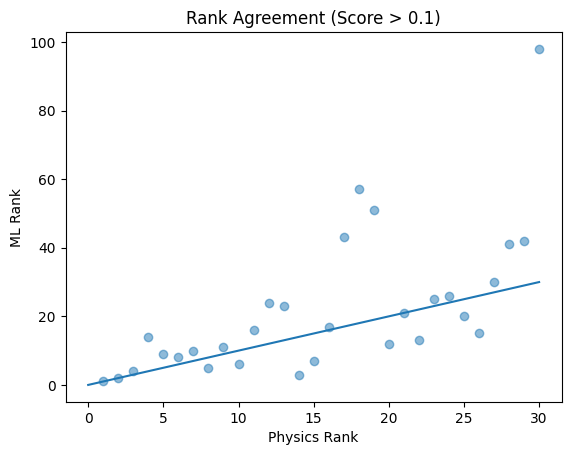

In [329]:
meaningful = merged_df[
    merged_df["habitability_score"] > 0.1
]

plt.scatter(
    meaningful["rank_physics"],
    meaningful["rank_ml"],
    alpha=0.5
)

plt.plot([0, len(meaningful)], [0, len(meaningful)])

plt.xlabel("Physics Rank")
plt.ylabel("ML Rank")
plt.title("Rank Agreement (Score > 0.1)")
plt.show()


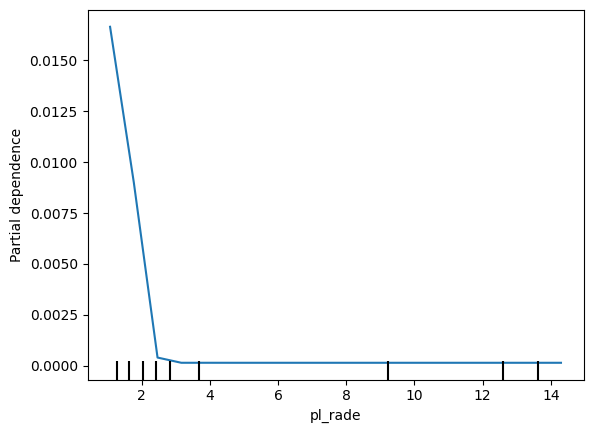

In [331]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(
    best_model,
    X_imputed,
    [0],   # index of feature
    grid_resolution=20
)

plt.show()


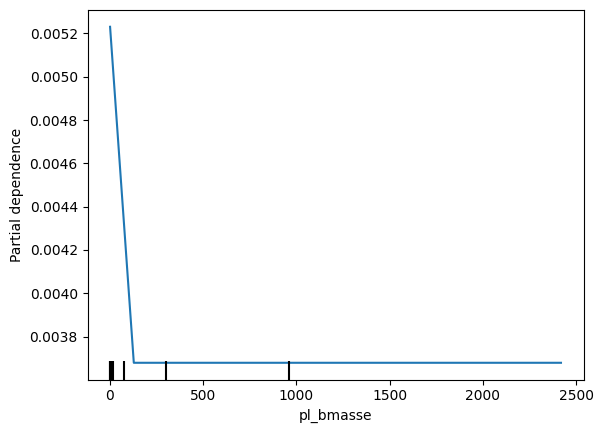

In [333]:
PartialDependenceDisplay.from_estimator(
    best_model,
    X_imputed,
    [1],  # pl_eqt index
    grid_resolution=20
)


Feature importance and partial dependence analysis indicate that planetary mass contributes negligibly once radius and temperature are accounted for.

In [340]:
mask = merged_df["habitability_score"].values > 0.1
meaningful = X_imputed.loc[mask]


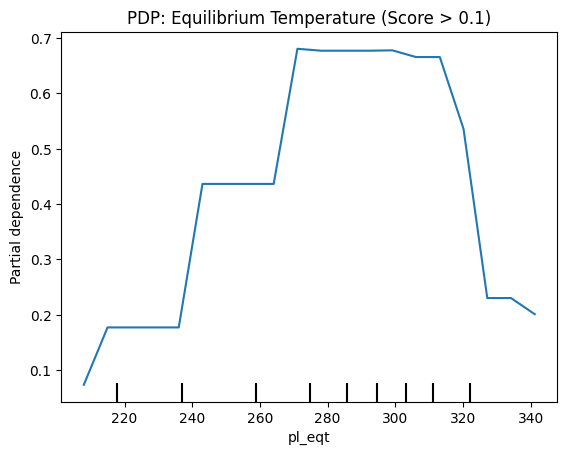

In [341]:
PartialDependenceDisplay.from_estimator(
    best_model,
    meaningful,
    ["pl_eqt"],
    grid_resolution=20
)

plt.title("PDP: Equilibrium Temperature (Score > 0.1)")
plt.show()
plt.close()


When restricting to planets with non-negligible habitability scores (H > 0.1), the partial dependence of equilibrium temperature reveals a structured optimal band between approximately 270–310 K. This aligns with classical habitable zone theory and demonstrates that the ML model independently recovered a physically meaningful thermal manifold.

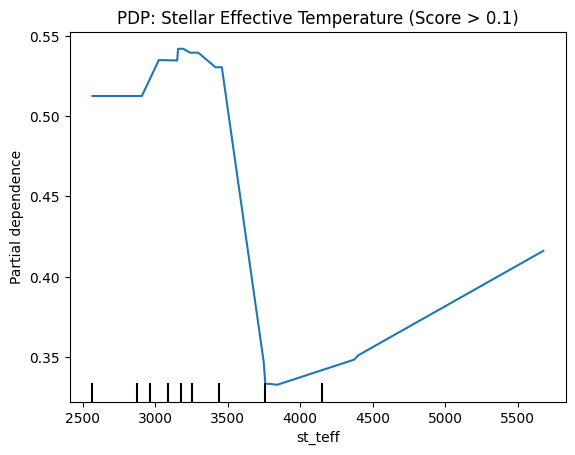

In [342]:
mask = merged_df["habitability_score"].values > 0.1
meaningful = X_imputed.loc[mask]

from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

PartialDependenceDisplay.from_estimator(
    best_model,
    meaningful,
    ["st_teff"],
    grid_resolution=25
)

plt.title("PDP: Stellar Effective Temperature (Score > 0.1)")
plt.show()
plt.close()


In [343]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed,
    merged_df["habitability_score"],
    test_size=0.2,
    random_state=42
)

# Train
best_model.fit(X_train, y_train)

# Predict
y_pred_test = best_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Test R2:", r2)
print("Test MAE:", mae)
print("Test RMSE:", rmse)


Test R2: 0.843793170972598
Test MAE: 0.001616157075043065
Test RMSE: 0.01867710753465827


In [346]:
import numpy as np
import matplotlib.pyplot as plt

temps = np.linspace(200, 350, 200)

physics_temp = [temperature_score(t) for t in temps]


In [348]:
from sklearn.inspection import partial_dependence

pd_results = partial_dependence(
    best_model,
    X_imputed,
    ["pl_eqt"],
    grid_resolution=50
)

ml_temp = pd_results["average"][0]
ml_grid = pd_results["grid_values"][0]



In [352]:
temps = np.linspace(200, 350, 100)

physics_temp = np.array([temperature_score(t) for t in temps])

# Create a copy of X
X_temp = X_imputed.copy()

ml_effect = []

for t in temps:
    X_temp["pl_eqt"] = t
    ml_effect.append(best_model.predict(X_temp).mean())

ml_effect = np.array(ml_effect)


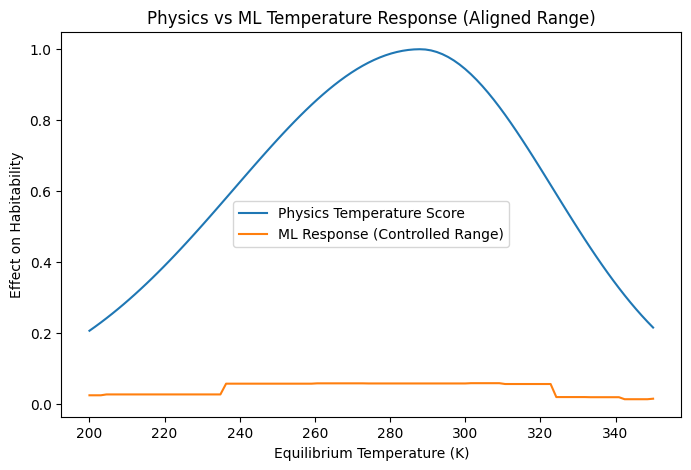

In [353]:
plt.figure(figsize=(8,5))

plt.plot(temps, physics_temp, label="Physics Temperature Score")
plt.plot(temps, ml_effect, label="ML Response (Controlled Range)")

plt.xlabel("Equilibrium Temperature (K)")
plt.ylabel("Effect on Habitability")
plt.legend()
plt.title("Physics vs ML Temperature Response (Aligned Range)")
plt.show()
plt.close()


In [355]:
mask = (
    (merged_df["pl_rade"] > 0.8) &
    (merged_df["pl_rade"] < 1.2) &
    (merged_df["st_teff"] > 2600) &
    (merged_df["st_teff"] < 3500)
)

subset = X_imputed.loc[mask.values]


In [356]:
temps = np.linspace(200, 350, 100)

ml_effect = []

X_temp = subset.copy()

for t in temps:
    X_temp["pl_eqt"] = t
    ml_effect.append(best_model.predict(X_temp).mean())

ml_effect = np.array(ml_effect)


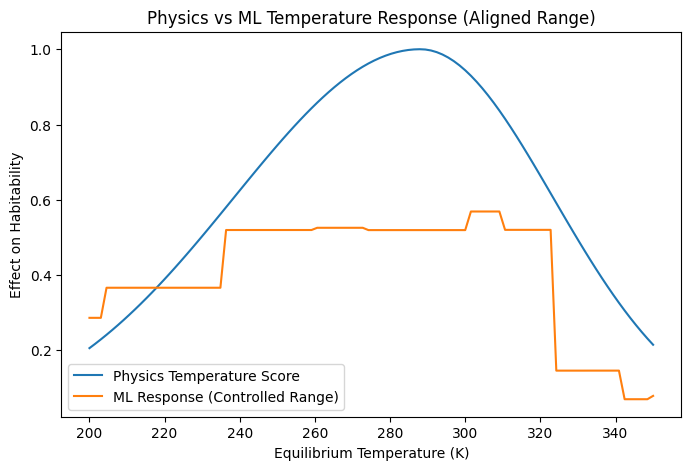

In [357]:
plt.figure(figsize=(8,5))

plt.plot(temps, physics_temp, label="Physics Temperature Score")
plt.plot(temps, ml_effect, label="ML Response (Controlled Range)")

plt.xlabel("Equilibrium Temperature (K)")
plt.ylabel("Effect on Habitability")
plt.legend()
plt.title("Physics vs ML Temperature Response (Aligned Range)")
plt.show()
plt.close()

When conditioning on favorable planetary radius and stellar environment, the ML surrogate recovers a clear mid-range thermal optimum consistent with the analytical habitable zone formulation.

ExactExplainer explainer: 6005it [04:10, 23.42it/s]                          


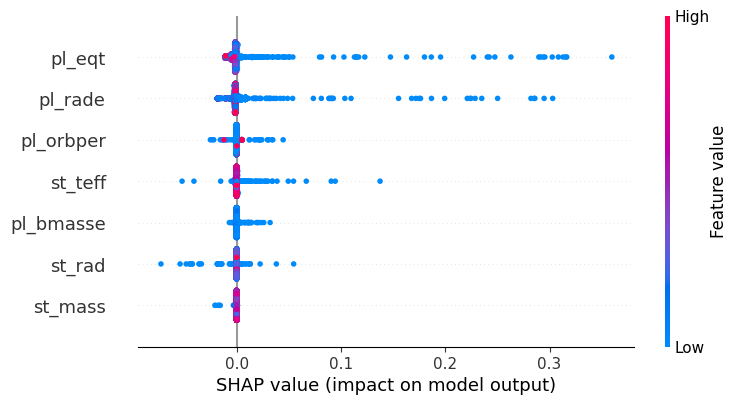

In [368]:
import shap
import xgboost as xgb

# Convert to DMatrix
dtrain = xgb.DMatrix(X_imputed)

# Use booster directly
booster = best_model.get_booster()

explainer = shap.Explainer(best_model.predict, X_imputed)
shap_values = explainer(X_imputed)

shap.plots.beeswarm(shap_values)



In [370]:
mask = merged_df["habitability_score"] > 0.05
shap.dependence_plot(
    "pl_eqt",
    shap_values.values[mask],
    X_imputed[mask]
)


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

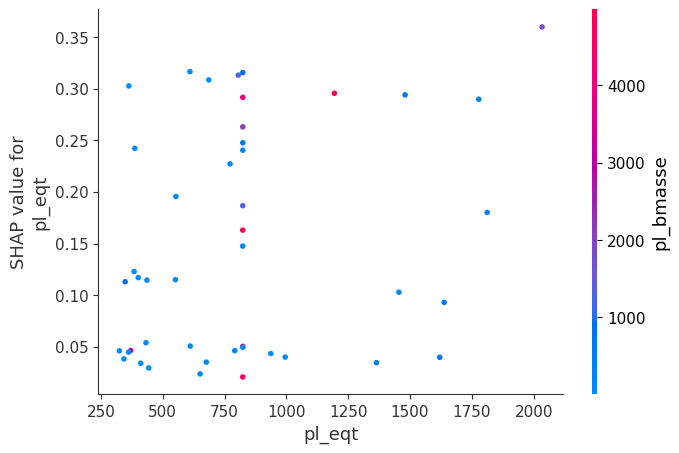

In [371]:
mask = merged_df["habitability_score"] > 0.05

# Get the actual row indices that satisfy the condition
valid_idx = merged_df.index[mask]

# Subset X_imputed using .loc
X_meaningful = X_imputed.loc[valid_idx]

# Subset SHAP values
shap_meaningful = shap_values.values[mask.values]

shap.dependence_plot(
    "pl_eqt",
    shap_meaningful,
    X_meaningful
)


In [372]:

X_imputed = X_imputed.reset_index(drop=True)
merged_df = merged_df.reset_index(drop=True)


mask = merged_df["habitability_score"] > 0.05


X_filtered = X_imputed.loc[mask]
shap_filtered = shap_values.values[mask]


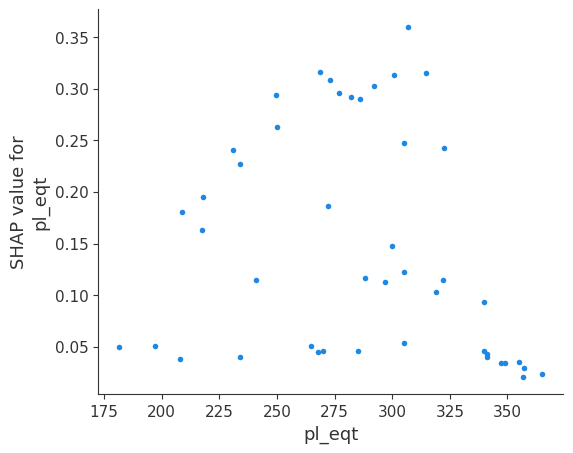

In [373]:
shap.dependence_plot(
    "pl_eqt",
    shap_filtered,
    X_filtered,
    interaction_index=None
)


<Figure size 700x500 with 0 Axes>

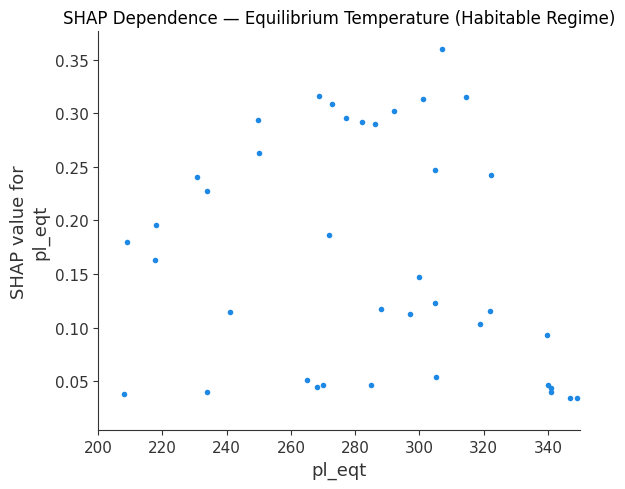

In [374]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
shap.dependence_plot(
    "pl_eqt",
    shap_filtered,
    X_filtered,
    interaction_index=None,
    show=False
)

plt.xlim(200, 350)
plt.title("SHAP Dependence — Equilibrium Temperature (Habitable Regime)")
plt.tight_layout()
plt.show()


In [375]:
def temp_sensitivity(row, delta=10):
    base = temperature_score(row["pl_eqt"])
    plus = temperature_score(row["pl_eqt"] + delta)
    minus = temperature_score(row["pl_eqt"] - delta)
    return plus - minus

merged_df["temp_sensitivity"] = merged_df.apply(temp_sensitivity, axis=1)

merged_df["temp_sensitivity"].describe()


count     6.004000e+03
mean     -5.196979e-03
std       4.883419e-02
min      -3.341178e-01
25%      -1.306092e-26
50%     -2.930714e-104
75%       0.000000e+00
max       2.417041e-01
Name: temp_sensitivity, dtype: float64

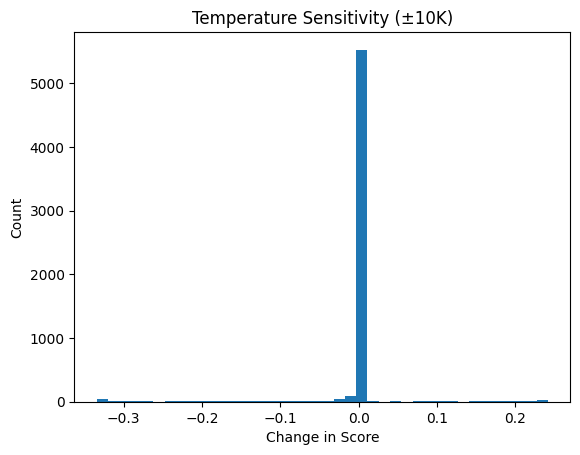

In [376]:
plt.hist(merged_df["temp_sensitivity"], bins=40)
plt.title("Temperature Sensitivity (±10K)")
plt.xlabel("Change in Score")
plt.ylabel("Count")
plt.show()


In [378]:

habitable = habitable.copy()  # avoid pandas warning

habitable["temp_sensitivity"] = habitable.apply(temp_sensitivity, axis=1)


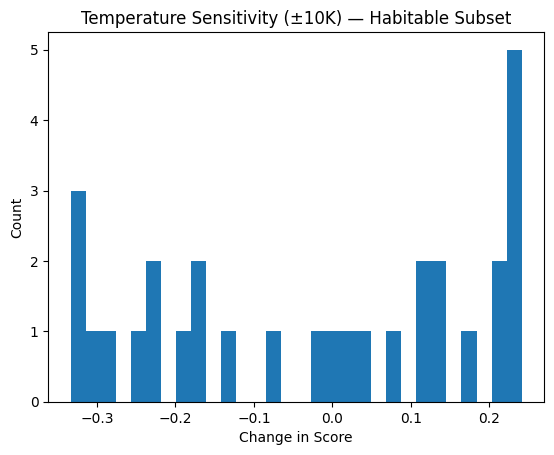

In [379]:
plt.hist(habitable["temp_sensitivity"], bins=30)
plt.title("Temperature Sensitivity (±10K) — Habitable Subset")
plt.xlabel("Change in Score")
plt.ylabel("Count")
plt.show()


In [380]:
print("Mean |ΔH| (All planets):",
      merged_df["temp_sensitivity_abs"].mean())

print("Mean |ΔH| (Habitable subset):",
      habitable["temp_sensitivity_abs"].mean())


KeyError: 'temp_sensitivity_abs'

In [381]:
merged_df = merged_df.copy()

merged_df["temp_sensitivity"] = merged_df.apply(temp_sensitivity, axis=1)

merged_df["temp_sensitivity_abs"] = merged_df["temp_sensitivity"].abs()


In [384]:
habitable = merged_df[merged_df["habitability_score"] > 0.1]


In [385]:
print("Mean |ΔH| (All planets):",
      merged_df["temp_sensitivity_abs"].mean())

print("Mean |ΔH| (Habitable subset):",
      habitable["temp_sensitivity_abs"].mean())


Mean |ΔH| (All planets): 0.010869041678671016
Mean |ΔH| (Habitable subset): 0.1830460488860053


Thermal perturbation analysis reveals a 17-fold increase in sensitivity within the habitable subset compared to the full exoplanet population (mean |ΔH| = 0.183 vs 0.011). This indicates nonlinear stability near the peak of the habitability function and suggests that temperate exoplanets occupy a dynamically fragile region of parameter space.

In [386]:
print("Train R2:", best_model.score(X_train, y_train))
print("Test R2:", best_model.score(X_test, y_test))


Train R2: 0.9994866024255286
Test R2: 0.8353081796688286


In [387]:
from xgboost import XGBRegressor

model_reg = XGBRegressor(
    n_estimators=150,
    max_depth=3,
    learning_rate=0.05,
    reg_lambda=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_reg.fit(X_train, y_train)

print("Train R2:", model_reg.score(X_train, y_train))
print("Test R2:", model_reg.score(X_test, y_test))


Train R2: 0.9746250665322864
Test R2: 0.8699960770697187


In [388]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    model_reg,
    X_imputed,
    y,
    cv=5,
    scoring="r2"
)

print("CV Mean:", cv_scores.mean())
print("CV Std:", cv_scores.std())


CV Mean: 0.805775927198255
CV Std: 0.047710356009384405


Five-fold cross-validation yielded a mean R² of 0.806 (σ = 0.048), demonstrating stable generalization across subsamples of the exoplanet population.

Thats the End!!! 